In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("Maharashtra.csv")


In [11]:
Days=np.array(df['days'])
print("Days",Days)
Confirmed=np.array(df['confirmed'])
print("Confirmed",Confirmed)
Deaths=np.array(df['deceased'])
print("Deaths",Deaths)
Recovered=np.array(df['recovered'])
print("Recoverd",Recovered)

Days [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
Confirmed [  14   18    6    3    3    4    4   12   10   23   10   15    3   31
   30   17   17   82   33   88   64  148  112  121  150  117  229  210
  187  221  352  346  236  285  120  327  552  466  552  431  778  390
  811  440  522  728  597  583 1008  790  678 1567  984 1233 1216 1089
 1165 1943 1230 1026 1495 1602 1576 1606 2347 2005 2078 2161 2345 2940
 2608 3041 2436 2091 2190 2598 2682 2940 2487 2358 2287 2560 2933 2436
 2739 3007 2554 2258 3254 3607 3493 3427 3390 2786 2701 3307 3752 3827
 3874 3870 3721 3214 3889 4842]
Deaths [   0    0    0    1    0 

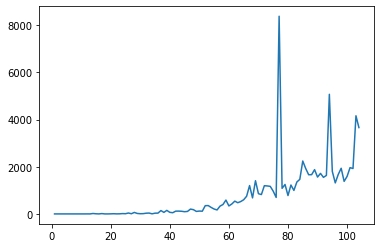

In [12]:
plt.plot(Days,Recovered)

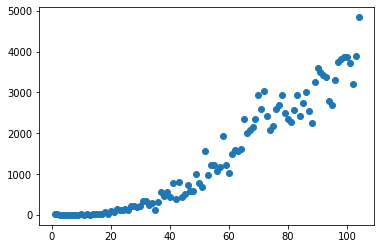

In [13]:
plt.scatter(Days,Confirmed)

In [14]:
random_indices=(np.random.permutation(104))
print(random_indices)
Days_train=Days[random_indices[:]]
print(Days_train)
Confirmed_train=Confirmed[random_indices[:]]
print(Confirmed_train)
Recovered_train=Recovered[random_indices[:]]
Recovered_test=Recovered[random_indices[80:]]
print(Recovered_train)
Deaths_train=Deaths[random_indices[:]]
print(Deaths_train)



[ 74  81  55   1  53  77  62  64  12  79  61  14  11  31   8  91  93  39
  84  37  83  22  17   6  47 103  70   2  35  89  98  58  33  30  21  15
  34  73  97  10  69   5  59  65  45  60   7  68  49  92  94  56  78  44
  25   4  71  90  29  43 101  57  26  82  87  40  99  50  86  20  16  80
  32  13 100  96   9  54  67  88  19  42   3  41  76  51  36  46  38  66
  63  27  24  52   0  72  85  23 102  75  48  18  95  28]
[ 75  82  56   2  54  78  63  65  13  80  62  15  12  32   9  92  94  40
  85  38  84  23  18   7  48 104  71   3  36  90  99  59  34  31  22  16
  35  74  98  11  70   6  60  66  46  61   8  69  50  93  95  57  79  45
  26   5  72  91  30  44 102  58  27  83  88  41 100  51  87  21  17  81
  33  14 101  97  10  55  68  89  20  43   4  42  77  52  37  47  39  67
  64  28  25  53   1  73  86  24 103  76  49  19  96  29]
[2190 2560 1089   18 1233 2940 1576 2347    3 2358 1602   30   15  346
   10 3427 2786  431 2739  466 2436  112   82    4  583 4842 2608    6
  327 3607 3

In [15]:
print(len(Confirmed_train))
print(len(Recovered_train))

104
104


In [16]:
#Linear Regression
def model_train(x_train,y_train):
  model=LinearRegression()#Instace for Linear Model
  #sklearn takes input as matrix so we have to reshape the matrix into column matrix
  x_train_for_fitting=np.matrix(x_train.reshape(len(x_train),1))
  y_train_for_fitting=np.matrix(y_train.reshape(len(y_train),1))
  
  #fit the data into the model
  return(model.fit(x_train_for_fitting,y_train_for_fitting))

In [17]:
model=model_train(Days_train,Confirmed_train)
model_prediction=model.predict(Days.reshape(len(Days),1))
print(Days_train)
print(Confirmed_train)

[ 75  82  56   2  54  78  63  65  13  80  62  15  12  32   9  92  94  40
  85  38  84  23  18   7  48 104  71   3  36  90  99  59  34  31  22  16
  35  74  98  11  70   6  60  66  46  61   8  69  50  93  95  57  79  45
  26   5  72  91  30  44 102  58  27  83  88  41 100  51  87  21  17  81
  33  14 101  97  10  55  68  89  20  43   4  42  77  52  37  47  39  67
  64  28  25  53   1  73  86  24 103  76  49  19  96  29]
[2190 2560 1089   18 1233 2940 1576 2347    3 2358 1602   30   15  346
   10 3427 2786  431 2739  466 2436  112   82    4  583 4842 2608    6
  327 3607 3874 1230  285  352  148   17  120 2091 3827   10 2940    4
 1026 2005  728 1495   12 2345  790 3390 2701 1165 2487  522  117    3
 3041 3493  221  440 3214 1943  229 2933 2258  778 3870  678 2554   64
   17 2287  236   31 3721 3752   23 1216 2161 3254   88  811    3  390
 2682 1567  552  597  552 2078 1606  210  150  984   14 2436 3007  121
 3889 2598 1008   33 3307  187]


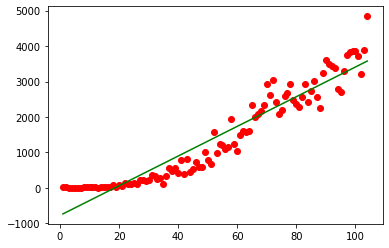

In [18]:
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape(len(Days),1),model_prediction,color="green")

In [22]:
def poly_regr(X_train,Y_train,degree):
  polynom=PolynomialFeatures(degree=degree)
  X_poly=polynom.fit_transform(X_train.reshape(len(X_train),1))
  polyReg=LinearRegression()
  return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1))

In [23]:
polynom=PolynomialFeatures(degree=4)
model=poly_regr(Days_train,Confirmed_train,4)

In [25]:
print(model)

predict=model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [33]:
#Creating Array Of Custom Days
Days_array=[]
for i in range(100,200):
  Days_array.append(i)
Days_predict=np.array(Days_array)
#Prdict the model on future date
predict_confirm=model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

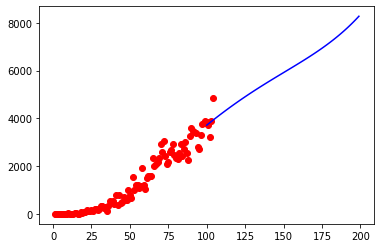

In [35]:
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days_predict,predict_confirm,color="blue")